This helper notebook downloads and preprocesses the data for the project

In [ ]:
# Import libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
from datasets import load_dataset

# Import helper funcitons
from helperFunction import NewsHelper
from helperFunction import SentimentHelper as sh
from helperFunction import TickerHelper as th

# Set parameters
printPlots_param = True
printStats_param = True
start_date = '2025-01-01'
end_date = '2025-11-20'

# Specify datapath
datapath = "C:/WU/SBWL Data Science/Course 4 - LLMs/Project/data/kaggle_sentiment/

# Dataset 1

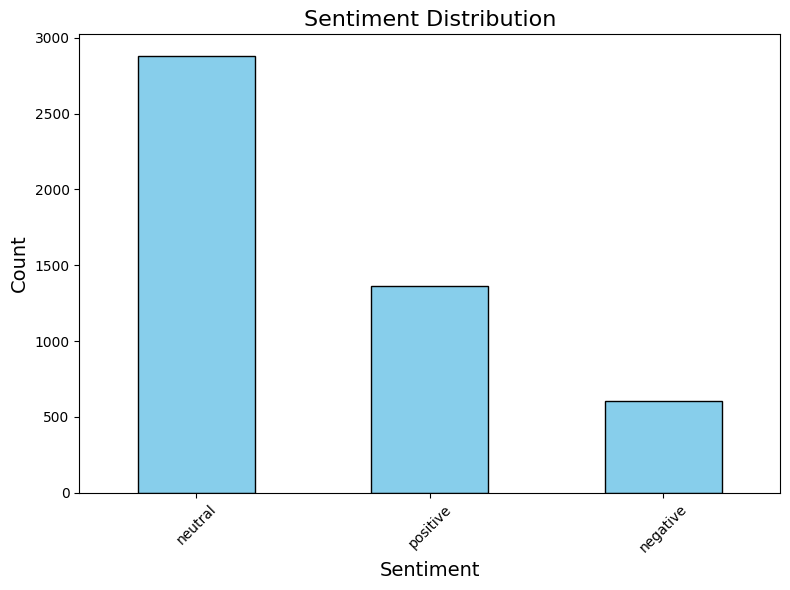

Total number of observations: 4846
Positive news: 28.13%
Neutral news: 59.41%
Negative news: 12.46%


In [3]:
# https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news
dataset1 = pd.read_csv("C:/WU/SBWL Data Science/Course 4 - LLMs/Project/data/kaggle_sentiment/all-data.csv", encoding="ISO-8859-1", header=None)
dataset1.columns = ['sentiment', 'text']

sh.sentiment_distribution(dataset1, printPlots_param, printStats_param)

# Dataset 2

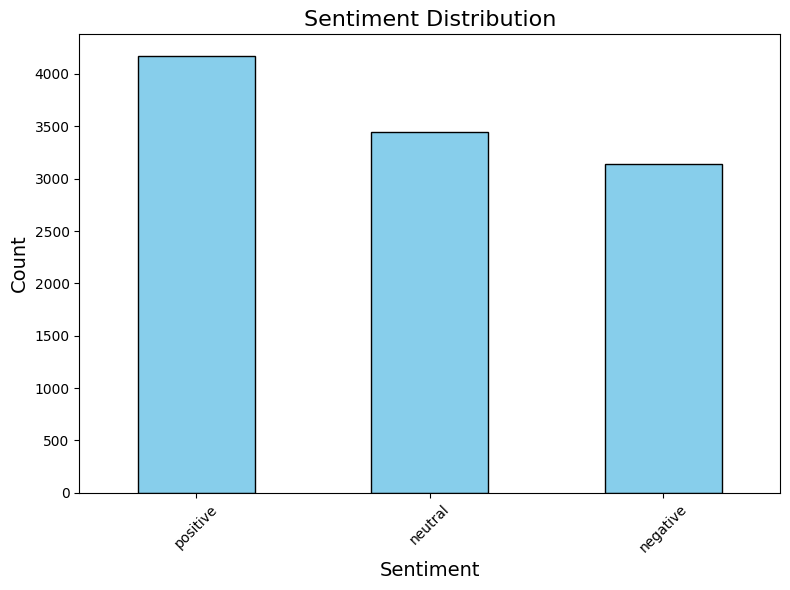

Total number of observations: 10753
Positive news: 38.78%
Neutral news: 32.029999999999994%
Negative news: 29.189999999999998%


In [4]:
# https://www.kaggle.com/datasets/ankurzing/aspect-based-sentiment-analysis-for-financial-news
dataset2 = pd.read_csv("C:/WU/SBWL Data Science/Course 4 - LLMs/Project/data/kaggle_sentiment/SEntFiN-v1.1.csv")
dataset2['Decisions'] = dataset2['Decisions'].apply(json.loads)

expanded_rows = []

for index, row in dataset2.iterrows():
    decisions = row['Decisions']
    
    # Get the first company-sentiment pair (the first item in the dictionary)
    first_company, first_sentiment = list(decisions.items())[0]
    
    # Create a new row with the title, first company, and its sentiment
    expanded_rows.append({
        'Title': row['Title'],  # Keep the title for the row
        'Company': first_company,  # Use the first company
        'Sentiment': first_sentiment  # Use the sentiment of the first company
    })

# Create a new DataFrame with expanded rows
dataset2 = pd.DataFrame(expanded_rows)

dataset2 = dataset2[['Sentiment', 'Title']]
dataset2.columns = ['sentiment', 'text']

sh.sentiment_distribution(dataset2, printPlots_param, printStats_param)

# Dataset 3

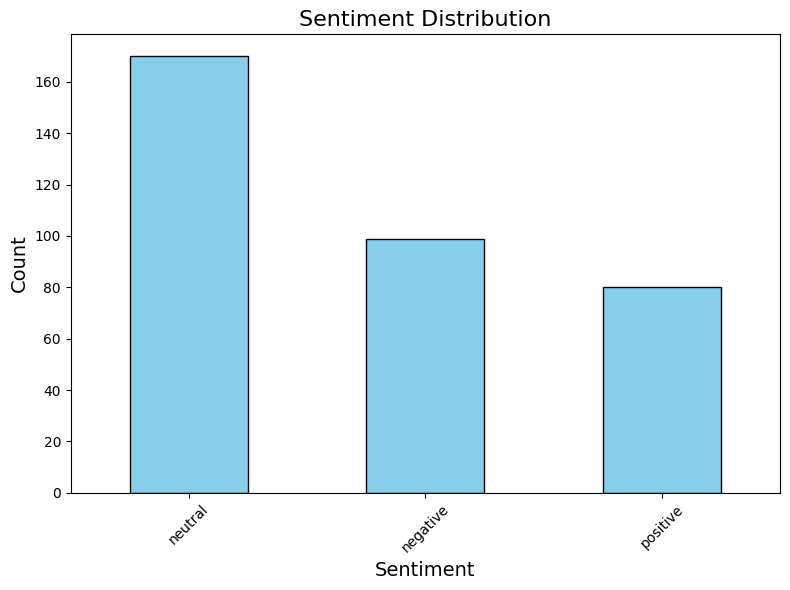

Total number of observations: 349
Positive news: 22.919999999999998%
Neutral news: 48.71%
Negative news: 28.37%


In [5]:
# https://zenodo.org/records/17628513
dataset3 = pd.read_csv("C:/WU/SBWL Data Science/Course 4 - LLMs/Project/data/kaggle_sentiment/stock_news.csv")

dataset3 = dataset3[['Label', 'News']]
dataset3.columns = ['sentiment','text']
dataset3['sentiment'] = dataset3['sentiment'].replace({1: 'positive', 0: 'neutral', -1: 'negative'})

sh.sentiment_distribution(dataset3, printPlots_param, printStats_param)

# Dataset 4 (Not used)

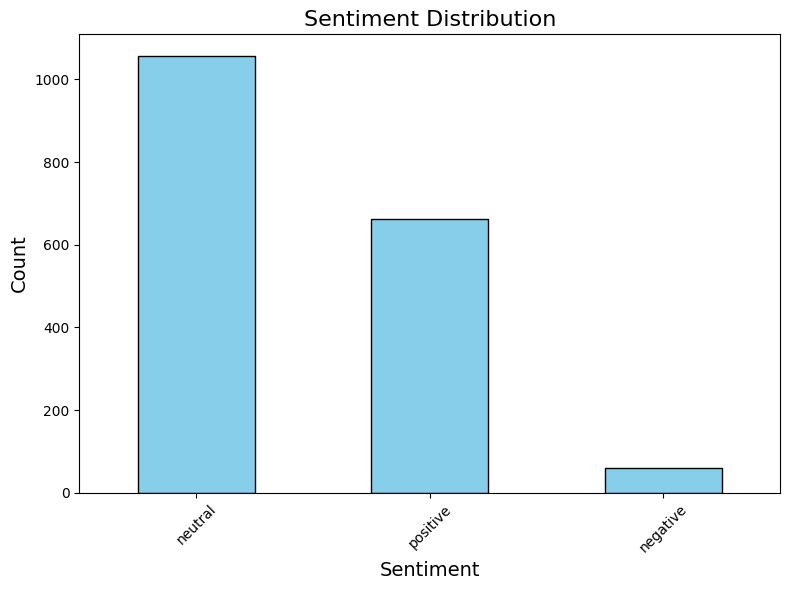

Total number of observations: 1779
Positive news: 37.21%
Neutral news: 59.36%
Negative news: 3.4299999999999997%


In [6]:
# https://huggingface.co/datasets/Jean-Baptiste/financial_news_sentiment
ds4 = load_dataset("Jean-Baptiste/financial_news_sentiment")
dataset4 = pd.concat([pd.DataFrame(ds4['train']), pd.DataFrame(ds4['test'])], ignore_index=True)

dataset4 = dataset4[['labels','summary_detail_with_title']]
dataset4.columns = ['sentiment','text']
dataset4['sentiment'] = dataset4['sentiment'].replace({2: 'positive', 1: 'neutral', 0: 'negative'})

sh.sentiment_distribution(dataset4, printPlots_param, printStats_param)

# Dataset 5 (Not used)

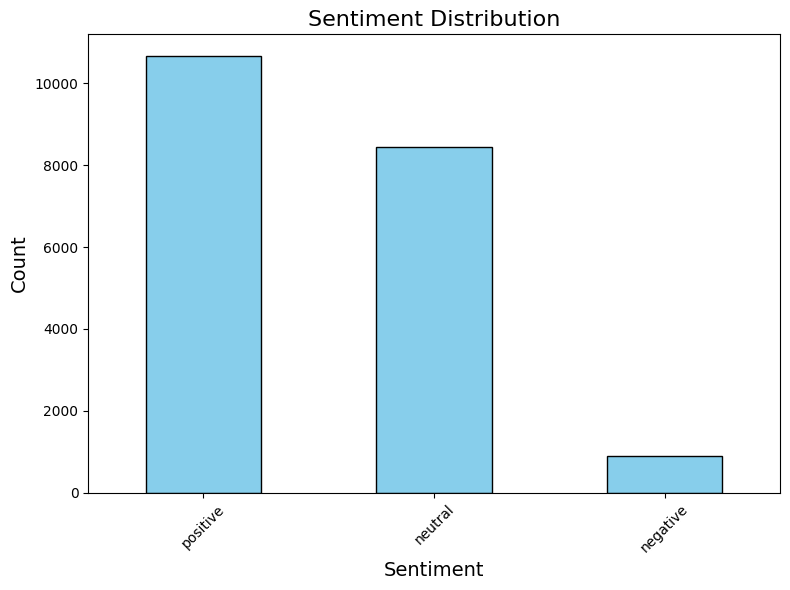

Total number of observations: 20000
Positive news: 53.31%
Neutral news: 42.18%
Negative news: 4.52%


In [7]:
# https://huggingface.co/datasets/zhihangliu/alphavantage_financial_sentiment_news
ds5 = load_dataset("zhihangliu/alphavantage_financial_sentiment_news")
dataset5 = pd.concat([pd.DataFrame(ds5['train']), pd.DataFrame(ds5['validation'])], ignore_index=True)

dataset5 = dataset5[['label','text']]
dataset5.columns = ['sentiment','text']
dataset5['sentiment'] = dataset5['sentiment'].replace({'bullish': 'positive', 'bearish': 'negative'})

sh.sentiment_distribution(dataset5, printPlots_param, printStats_param)

# Merge data

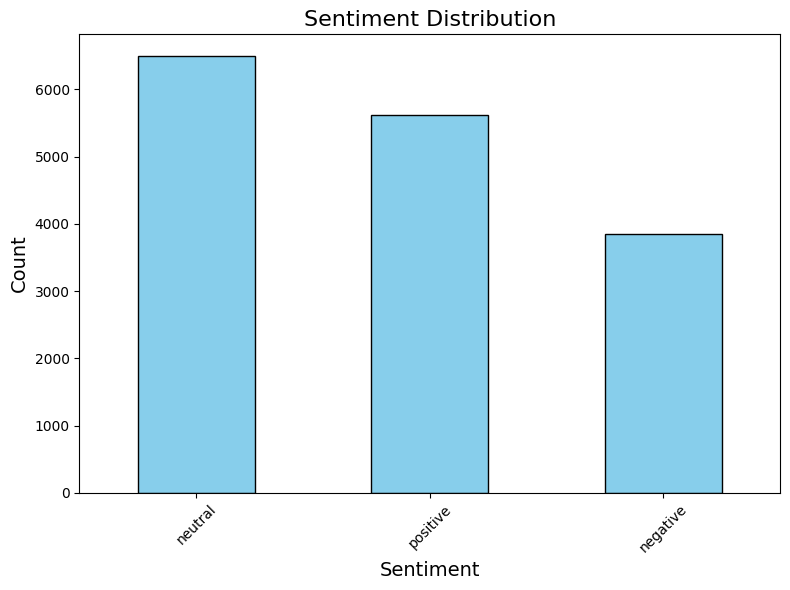

Total number of observations: 15948
Positive news: 35.199999999999996%
Neutral news: 40.71%
Negative news: 24.09%


In [8]:
# data = pd.concat([dataset1, dataset2, dataset3, dataset4, dataset5], ignore_index=True)
data = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

sh.sentiment_distribution(data, printPlots_param, printStats_param)

# Balance distribtion

In [ ]:
min_count = data['sentiment'].value_counts().min()
neutral_df = data[data['sentiment'] == 'neutral'].sample(min_count, random_state=42)
positive_df = data[data['sentiment'] == 'positive'].sample(min_count, random_state=42)
negative_df = data[data['sentiment'] == 'negative'].sample(min_count, random_state=42)

balanced_df = pd.concat([neutral_df, positive_df, negative_df])
balanced_df.to_csv(datapath + "balanced_sentiment_data_small.csv", index=False)

# Price Data 

In [ ]:
universe = 'DOW'
tickers = th.get_tickers(universe)
prices_dow = th.get_filtered_stock_data(tickers, start_date, end_date, 'Close')
prices_dow.to_csv(datapath + "prices_"+universe+"_"+start_date+"_"+end_date+".csv")

Fetching tickers from: https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average...
Successfully extracted 30 tickers.
Returning data for 30 valid tickers.


In [ ]:
universe = 'SP500'
tickers = th.get_tickers(universe)
prices_dow = th.get_filtered_stock_data(tickers, start_date, end_date, 'Close')
prices_dow.to_csv(datapath + "prices_"+universe+"_"+start_date+"_"+end_date+".csv")

Fetching tickers from: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies...
Successfully extracted 503 tickers.
Dropped 3 tickers due to incomplete data in range.
Returning data for 500 valid tickers.


In [ ]:
universe = 'NASDAQ100'
tickers = th.get_tickers(universe)
prices_dow = th.get_filtered_stock_data(tickers, start_date, end_date, 'Close')
prices_dow.to_csv(datapath + "prices_"+universe+"_"+start_date+"_"+end_date+".csv")

Fetching tickers from: https://en.wikipedia.org/wiki/Nasdaq-100...
Successfully extracted 102 tickers.
Dropped 1 tickers due to incomplete data in range.
Returning data for 101 valid tickers.


# Trading News Data

In [ ]:
tickers = th.get_tickers(universe)
news_downloader = NewsHelper(finnhub_api_key)
trading_news = news_downloader.get_group_news(tickers, start_date, end_date)
# trading_news.to_csv(datapath + "dow_news_all_data.csv")